# Using python to visualize the Singular Value Decomposition (SVD)

Many machine learning applications and algorithms involving matrices utilize their SVDs. A couple examples include dimensionality reduction via PCA and least-squares minimization. In this project you will take a peek "under the hood" of SVD by creating visuals of (a) what the three different parts ($U,\Sigma ,$ and $V^T$) of the decomposition represent and (b) how they fit together.

### Overview

The Singular Value Decomposition of a matrix is one of the most important tools in Linear Algebra and Machine Learning and has wide ranging applications such as:

(1) Principle Component Analysis and related methods of Dimensionality reduction

(2) Least squares minimization which is used in both linear regression as well as in minimizing the loss functions of neural networks

(3) Finding an approximate inverse matrix called a "pseudoinverse", when no inverse for a matrix exists

It's even used in applications such as

(4) finding the structure of proteins

and basic operations such as

(5) finding the rank of a matrix in numpy

Those are just a few, but there are many, many more.

 We will use Matplotlib and Plotly to visualize what the 3 different components of SVD are doing and how they fit together. We'll also code a function which returns the SVD of a matrix. We start by visualizing what a simple 2x2 matrix does when it "acts on" a set of data. By "act on", I mean that we are transforming the data by multiplying a 2x2 matrix M with the data-- where the data is written as a 2xd matrix where each column is an observation with 2 features and there are d total observations.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Next, we'll generate a randomly sampled set of 500 points, $a=(a^{(0)},\ldots,a^{(499)})$, from a standard two-dimensional normal distribution using the function [$\texttt{multivariate_normal}$](https://https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) in the [$\texttt{numpy.random}$](https://https://numpy.org/doc/stable/reference/random/index.html) package. To aid in visualization, the points are separated according to whether the first coordinate is positive or negative. You'll also create a normalized version of this random data $\hat a=\Bigr(\frac{a^{(0)}}{\|a^{(0)}\|},\ldots,\frac{a^{(499)}}{\|a^{(499)}\|}\Bigr)$, where each point lies on the unit circle $x^2+y^2=1$ of the $xy$-plane.

 We can call the function TwoColor_ScatterPlot call to display scatter plots of two data sets in two different colors (in this case, the two data sets will be the random data with first coordinate either positive or negative).

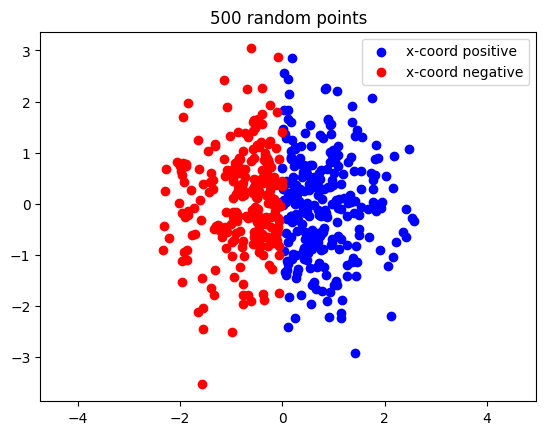

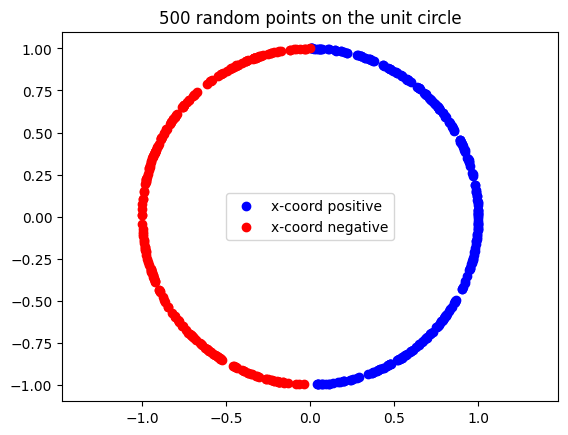

In [ ]:
# The default randomly generated data is set to 500 rows. The ".T" has the effect of transposing it to 500 columns.
# Changing 500 to some other number will not affect any code below.
# Experiment with correlated data by changing np.identity(2) to some other 2-by-2 covariance matrix. This is more realistic in applications, but might make visualization less clear.
a = np.random.multivariate_normal([0,0],np.identity(2),size=500).T

# Split out points with first coordinate positive which will be blue.
aBlue = a[:,a[0]>0]
# Split out points with first coordinate negative which will be red (the possibility of 0 is included here, but in theory this shouldn't happen).
aRed = a[:,a[0]<=0]

# Normalize a=(a_x,a_y) by dividing by the norm (a_x^2+a_y^2)^.5.
aHat = a/np.linalg.norm(a,axis=0)
# Split out points with first coord positive.
aHatBlue = aHat[:,aHat[0]>0]
# Split out points with first coord negative.
aHatRed = aHat[:,aHat[0]<=0]

def TwoColor_ScatterPlot(u,v,ucolor='blue',vcolor='red',ulabel='',vlabel='', vectors='off',title=''):
    if vectors=='on':
      origin_u, origin_v = np.zeros(u.shape[1]), np.zeros(v.shape[1])
      color_u, color_v   = [ucolor]*u.shape[1], [vcolor]*v.shape[1]
      plt.quiver(origin_u, origin_u, u[0,:], u[1,:], color=color_u, angles='xy', scale_units='xy', scale=1)
      plt.quiver(origin_v, origin_v, v[0,:], v[1,:], color=color_v, angles='xy', scale_units='xy', scale=1)
    plt.scatter(u[0],u[1], color=ucolor, label=ulabel)
    plt.scatter(v[0],v[1], color=vcolor, label=vlabel)
    plt.axis('equal')
    if title: plt.title(title)
    if ulabel or vlabel:  plt.legend()
    plt.show()

# Use the above function to make plots of two data sets with two different colors on one display.
# Do this for both the original data, and the normalized data.
TwoColor_ScatterPlot(aBlue,aRed,ulabel='x-coord positive',vlabel='x-coord negative', title='500 random points')
TwoColor_ScatterPlot(aHatBlue,aHatRed,ulabel='x-coord positive',vlabel='x-coord negative', title='500 random points on the unit circle')

## Applying a Matrix to the Data

We've just loaded a 2x500 matrix of random data where each column is a point in the $xy$-plane chosen randomly from a standard 2-dimensional normal distribution.

There are 2 plots above. The first plot is the original random data points, while the second plot normalizes the points by dividing each point by its distance from the origin, i.e., it's norm. This normalization places the point on the unit circle, which can be seen by the second plot.

In both plots, notice that points with a positive $x$-coordinate are blue, while points with a negative $x$-coordinate are red. This is done in order to better visualize, later, how a matrix $M$ is transforming the various data points.



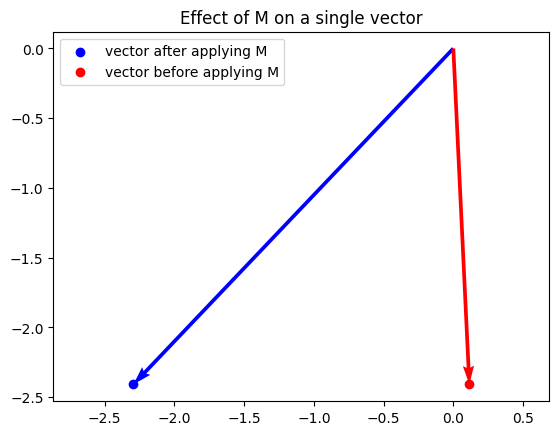

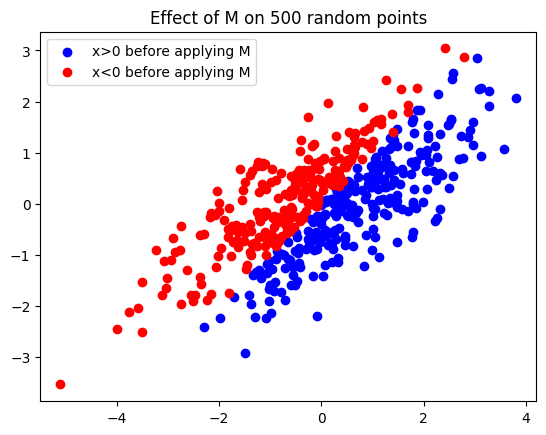

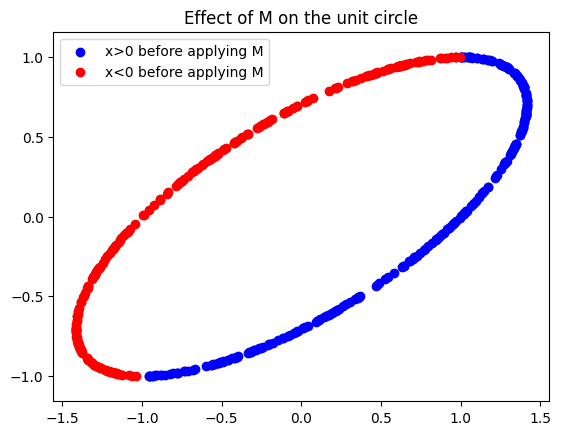

In [ ]:
# Load a shear matrix M.
# Experiment and try other matrices M.
M = [[1, 1], [0, 1]]

# Use the function np.dot to multiply (i.e., apply) M with the first column vector a[:,0:1].
# Make sure to use the slice 0:1 in the second index of a[:,0:1] instead of just 0, otherwise your array will lose one dimension.
# Experiment with other column vectors a[:,i:i+1] for any i=0,1,...,499, and/or larger slices of 2, 3, or more data points.
b0 = np.dot(M, a[:,0:1])


# Next, multiply M with each of the data sets aBlue, aRed, aHatBlue, aHatRed.
bBlue = np.dot(M, aBlue)
bRed = np.dot(M, aRed)
bHatBlue = np.dot(M, aHatBlue)
bHatRed = np.dot(M, aHatRed)


# Now plot the data, multiplied by M, using the preloaded function TwoColor_ScatterPlot.
# The first plot shows the effect of M on a single data point. The option vectors='on' displays the data as vectors.
# The second plot shows the effect of M on the unnormalized data, and the third plot shows the effect of M on the normalized data.
TwoColor_ScatterPlot(b0,a[:,0:1],'b','r','vector after applying M','vector before applying M', vectors='on', title='Effect of M on a single vector')
TwoColor_ScatterPlot(bBlue,bRed,'b','r','x>0 before applying M','x<0 before applying M', title='Effect of M on 500 random points')
TwoColor_ScatterPlot(bHatBlue,bHatRed,'b','r','x>0 before applying M','x<0 before applying M', title='Effect of M on the unit circle')


In the 2-dimensional example above, you can think of the 500 points as a crowd of people in a square. You can then interpret different $M$'s as taking photos of this crowd from different vantage points and different angles.

Over the rest of this project, we wil break up what is happening in the above images into three different steps, corresponding to the three different parts of SVD. We will do this, first, in the case where $M$ is the 2-by-2 shear matrix above, and then for 3-by-3, 3-by-2, and 2-by-3 matrices $M$.

##Different Parts of SVD: singular values and singular vectors

Suppose you are given an $m\times n$ matrix $M$, where m is greater than or equal to n. The singular values of $M$ are the square roots of the $n$ eigenvalues of the $n\times n$ matrix $M^TM$. Since $M^TM$ is a symmetric matrix, then it turns out that there are always n real-valued eigenvalues. Although, it is possible that some of these are repetitions. Another important mathematical fact is that the matrix $M^TM$ is a positive semi-definite matrix which means that those n eigenvalues will always be greater than or equal to 0.

Eigenvectors of $M^TM$ associated to its eigenvalues are the "right singular vectors" of $M$.

Another way of defining the singular values of $M$ is to use the square roots of the $m$ eigenvalues of the $m\times m$ matrix $MM^T$. Note that $M^TM$ is $n\times n$ while $MM^T$ is $m\times m$.

Eigenvectors of $MM^T$ associated to its eigenvalues are known as "left singular vectors" of $M$.

In the next part, we'll see the geometric interpretation of the singular values and the right and left singular vectors.


In [ ]:
# Use np.linalg.svd to get the SVD of M as U, Sigma, Vtranspose.
U, Sigma, Vtranspose = np.linalg.svd(M)


# Sigma is a 1-dimensional array. Transform it to a diagonal matrix using the function np.diag.
SigmaMat = np.diag(Sigma)

# Multiply M with V (with M on the left) and also U with SigmaMat
MV = np.dot(M,Vtranspose.T)
USigma = np.dot(U,SigmaMat)

# Verify that the above is correct, i.e., that MV==USigma.
if np.allclose(MV,USigma):
  print(MV)
  print(USigma)
  print("Arrays are the same: Verification passed")
else:
  print(MV, "does not equal", USigma, ": Verification failed, try again")

u0, v0 = U[:,0], Vtranspose.T[:,0]
sigma0 = Sigma[0]
Mv0 = np.dot(M,v0)
s0u0 = sigma0 * u0

# Verify
if np.allclose(Mv0,s0u0):
  print(Mv0, "equals", s0u0, ": Verification passed")
else:
  print(Mv0, "does not equal", s0u0, ": Verification failed, try again")

[[ 1.37638192 -0.3249197 ]
 [ 0.85065081  0.52573111]]
[[ 1.37638192 -0.3249197 ]
 [ 0.85065081  0.52573111]]
Arrays are the same: Verification passed
[1.37638192 0.85065081] equals [1.37638192 0.85065081] : Verification passed


## Orthogonal and Diagonal Matrices

Next we'll see a way to geometrically interpret those 3 parts of the SVD.

The SVD embodies the geometric fact that every $m\times n$ matrix $M$ transforms the unit sphere in $m$-dimensional Eucidean space to an ellipsoid in $n$-dimensional Euclidean space. How a matrix $M$ acts on a unit sphere is very important because, in fact, one can easily prove that the way $M$ acts on the unit sphere tells us everything we could possibly want to know about $M$-- we can even reconstruct $M$ with this knowledge.

Let's break down the SVD, $M=U \Sigma V^T$ and try to see how each of the matrices $V^T$, $\Sigma$, and $U$ are transforming data.



We will now apply $V^T$ to the blue/red parts of $a$ and $\hat a$ ($\hat a$ is written $\texttt{aHat}$ in the code), to get the transformed data sets $c=V^Ta$ and $\hat c=V^T\hat a$. Next, you will apply $\Sigma$ to $c$ and $\hat c$ to get the transformed data sets $d=\Sigma c$ and $\hat d=\Sigma \hat d$. Finally, you will apply $U$ to $d$ and $\hat d$ to get the transformed data sets $e=U d$ and $\hat e= U \hat e$. These last data sets are equal to $b$ and $\hat b$ since
$$ b= M a = (U\Sigma V^T) a = U\Sigma (V^T a) = U\Sigma c = U d = e.$$  

Remember that $\texttt{Sigma}$ returned from $\texttt{np.linalg.np}$ is a one-dimensional array. Change this into a diagonal matrix $\Sigma$ and apply this to $B=V^T A$ to get a resulting data matrix $C$. Then reshape $C=\Sigma B$ into the form of meshgrids in order to use go.Surface.

Finally, apply the orthogonal matrix $U$ to $C$, reshape the result, and plot the final image. This image should match the image of $M33$ directly applied to the upper hemisphere.

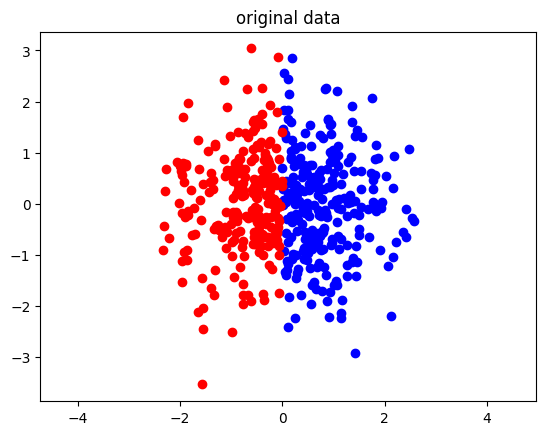

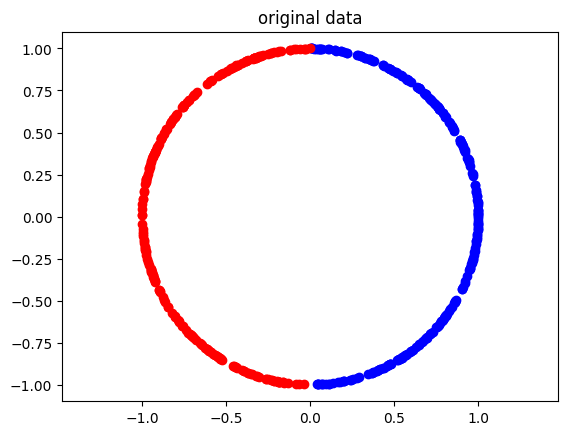

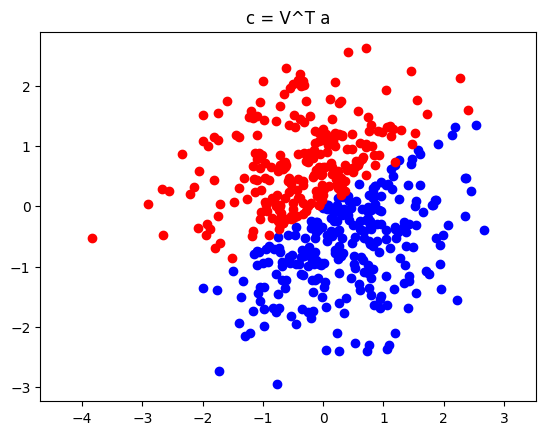

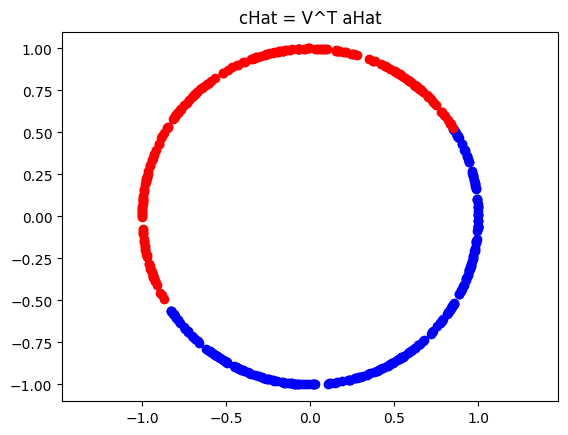

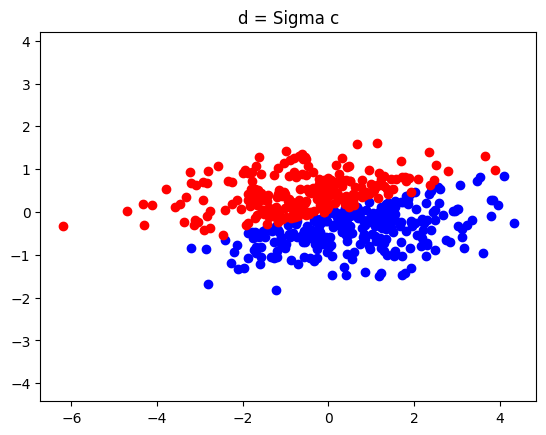

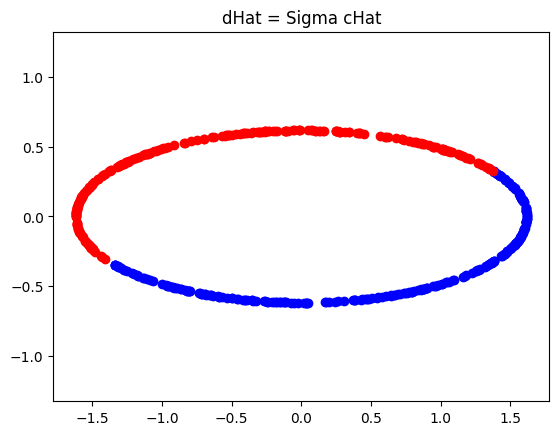

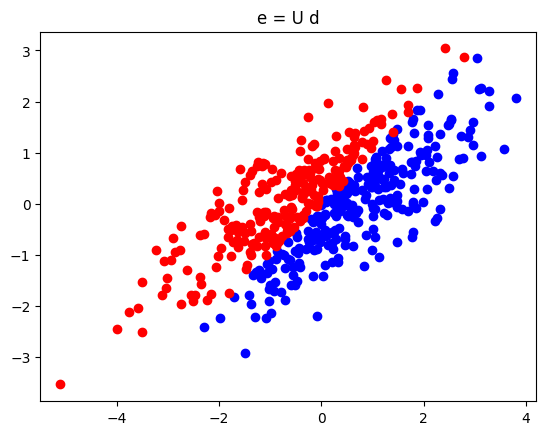

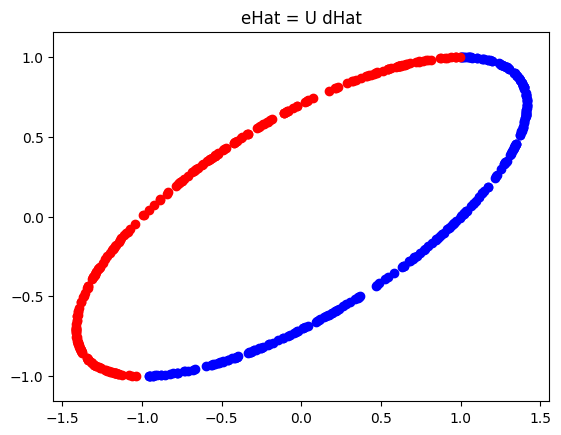

In [ ]:
# Multiply aBlue and aRed, by the matrix Vtranspose.
cBlue = np.dot(Vtranspose, aBlue)
cRed = np.dot(Vtranspose, aRed)

# Multiply aHatBlue and aHatRed, by the matrix Vtranspose.
cHatBlue = np.dot(Vtranspose, aHatBlue)
cHatRed = np.dot(Vtranspose, aHatRed)

# Plot the original data
TwoColor_ScatterPlot(aBlue,aRed, title='original data')
TwoColor_ScatterPlot(aHatBlue,aHatRed, title='original data')

# Plot the data using the preloaded function TwoColor_ScatterPlot.
TwoColor_ScatterPlot(cBlue,cRed, title='c = V^T a')
TwoColor_ScatterPlot(cHatBlue,cHatRed, title='cHat = V^T aHat')


# Multiply the blue and red parts of the data c and cHat, by the matrix SigmaMat.
dBlue = np.dot(SigmaMat, cBlue)
dRed = np.dot(SigmaMat, cRed)
dHatBlue = np.dot(SigmaMat, cHatBlue)
dHatRed = np.dot(SigmaMat, cHatRed)

# Plot the data using the preloaded function TwoColor_ScatterPlot.
TwoColor_ScatterPlot(dBlue,dRed, title='d = Sigma c')
TwoColor_ScatterPlot(dHatBlue,dHatRed, title='dHat = Sigma cHat')

# Multiply the blue and red parts of the data d and dHat, by the matrix U.
eBlue = np.dot(U, dBlue)
eRed = np.dot(U,dRed)
eHatBlue = np.dot(U, dHatBlue)
eHatRed = np.dot(U, dHatRed)


# Plot the data using the preloaded function TwoColor_ScatterPlot.
TwoColor_ScatterPlot(eBlue,eRed, title='e = U d')
TwoColor_ScatterPlot(eHatBlue,eHatRed, title='eHat = U dHat')

As seen above, applying $V^T$ to $a$ and $\hat a$ has the effect of rotating the image. Next, the effect the diagonal matrix $$
\Sigma =
\left[\begin{matrix}
\sigma_1 & 0\\
0 & \sigma_2 \\
\end{matrix}\right],
$$ has on the data sets $c$ and $\hat c$
is that it scales the data by a factor of $\sigma_1$ in the $x$-direction and a factor of $\sigma_2$ in the $y$-direction.
Note that the data is scaled in the **current** $x,y$ directions, not in the **original** $x,y$ directions which gave rise to red/blue coloring. The final step rotates the ellipse once again. The final pictures, after applying the three steps $V^T$ then $\Sigma$ then $U$, should match the pictures of the data $b$ and $\hat b$ when we applied $M$ directly to $a$ and $\hat a$.

Before moving on, try repeating the above steps on the matrix
$$M =
\left[\begin{matrix}
-.5 & -.5\\
0 & 1\\
\end{matrix}\right].$$
This matrix gives an example of a situation where $U$ and $V$ can both rotate and reflect. It also shows an example where the scaling matrix shrinks (as opposed to stretching) in one of the axes directions.



## In this next part, I just copy and pasted the code from above and changed the value of M to $$
\left[\begin{matrix}
-.5 & -.5\\
0 & 1\\
\end{matrix}\right]$$

##and repeated the same process. Renamed variables to avoid confusion.


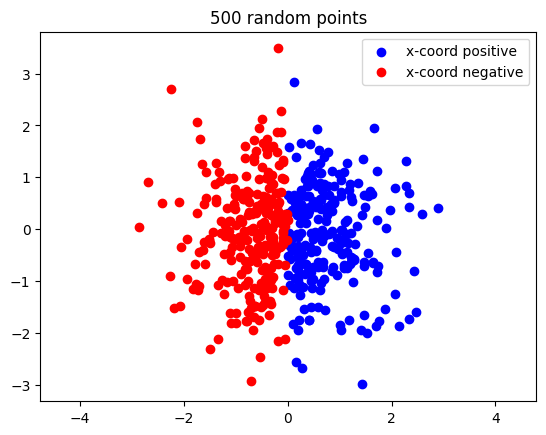

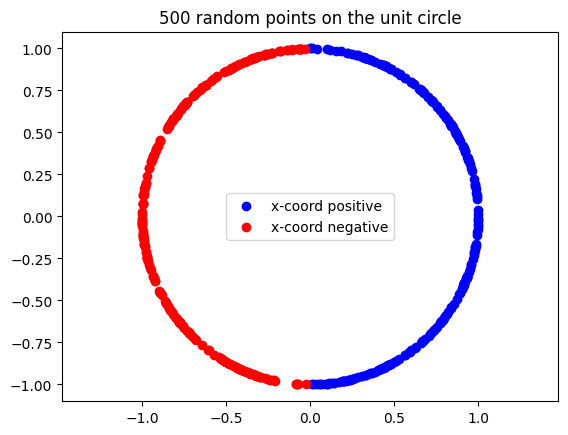

In [ ]:
# The default randomly generated data is set to 500 rows. The ".T" has the effect of transposing it to 500 columns.
# Changing 500 to some other number will not affect any code below.
# Experiment with correlated data by changing np.identity(2) to some other 2-by-2 covariance matrix. This is more realistic in applications, but might make visualization less clear.
a_2 = np.random.multivariate_normal([0,0],np.identity(2),size=500).T

# Split out points with first coordinate positive which will be blue.
a_2Blue = a_2[:,a_2[0]>0]
# Split out points with first coordinate negative which will be red (the possibility of 0 is included here, but in theory this shouldn't happen).
a_2Red = a_2[:,a_2[0]<=0]

# Normalize a=(a_x,a_y) by dividing by the norm (a_x^2+a_y^2)^.5.
a_2Hat = a_2/np.linalg.norm(a_2,axis=0)
# Split out points with first coord positive.
a_2HatBlue = a_2Hat[:,a_2Hat[0]>0]
# Split out points with first coord negative.
a_2HatRed = a_2Hat[:,a_2Hat[0]<=0]

def TwoColor_ScatterPlot(u,v,ucolor='blue',vcolor='red',ulabel='',vlabel='', vectors='off',title=''):
    if vectors=='on':
      origin_u, origin_v = np.zeros(u.shape[1]), np.zeros(v.shape[1])
      color_u, color_v   = [ucolor]*u.shape[1], [vcolor]*v.shape[1]
      plt.quiver(origin_u, origin_u, u[0,:], u[1,:], color=color_u, angles='xy', scale_units='xy', scale=1)
      plt.quiver(origin_v, origin_v, v[0,:], v[1,:], color=color_v, angles='xy', scale_units='xy', scale=1)
    plt.scatter(u[0],u[1], color=ucolor, label=ulabel)
    plt.scatter(v[0],v[1], color=vcolor, label=vlabel)
    plt.axis('equal')
    if title: plt.title(title)
    if ulabel or vlabel:  plt.legend()
    plt.show()

# Uses the above function to make plots of two data sets with two different colors on one display.
TwoColor_ScatterPlot(a_2Blue,a_2Red,ulabel='x-coord positive',vlabel='x-coord negative', title='500 random points')
TwoColor_ScatterPlot(a_2HatBlue,a_2HatRed,ulabel='x-coord positive',vlabel='x-coord negative', title='500 random points on the unit circle')

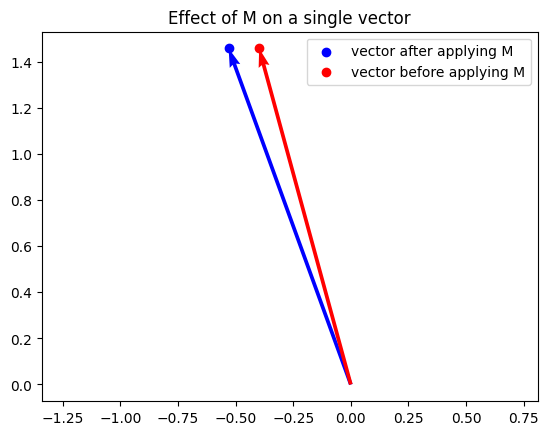

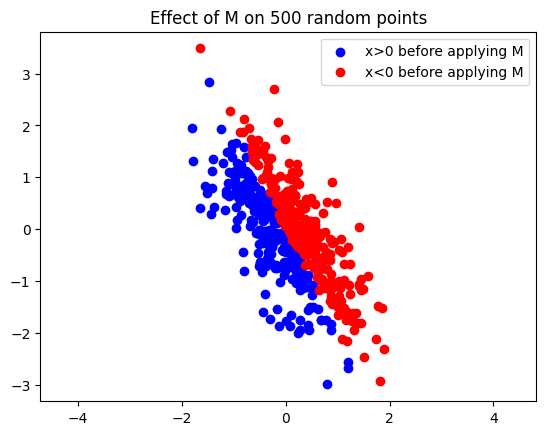

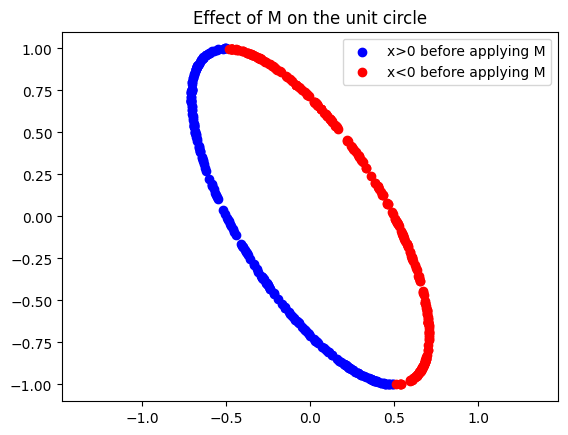

In [ ]:

# Load a shear matrix M.
# Experiment and try other matrices M.
M_2 = [[-0.5, -0.5], [0, 1]]

# Use the function np.dot to multiply (i.e., apply) M with the first column vector a[:,0:1].
# Make sure to use the slice 0:1 in the second index of a[:,0:1] instead of just 0, otherwise your array will lose one dimension.
# Experiment with other column vectors a[:,i:i+1] for any i=0,1,...,499, and/or larger slices of 2, 3, or more data points.
b0_2 = np.dot(M_2, a_2[:,0:1])

# Next, multiply M with each of the data sets aBlue, aRed, aHatBlue, aHatRed.
b_2Blue = np.dot(M_2, a_2Blue)
b_2Red = np.dot(M_2, a_2Red)
b_2HatBlue = np.dot(M_2, a_2HatBlue)
b_2HatRed = np.dot(M_2, a_2HatRed)

# Now plot the data, multiplied by M, using the preloaded function TwoColor_ScatterPlot.
# The first plot shows the effect of M on a single data point. The option vectors='on' displays the data as vectors.
# The second plot shows the effect of M on the unnormalized data, and the third plot shows the effect of M on the normalized data.
TwoColor_ScatterPlot(b0_2,a_2[:,0:1],'b','r','vector after applying M','vector before applying M', vectors='on', title='Effect of M on a single vector')
TwoColor_ScatterPlot(b_2Blue,b_2Red,'b','r','x>0 before applying M','x<0 before applying M', title='Effect of M on 500 random points')
TwoColor_ScatterPlot(b_2HatBlue,b_2HatRed,'b','r','x>0 before applying M','x<0 before applying M', title='Effect of M on the unit circle')

In [ ]:
# Use np.linalg.svd to get the SVD of M as U, Sigma, Vtranspose.
U_2, Sigma_2, Vtranspose_2 = np.linalg.svd(M_2)

# Sigma is a 1-dimensional array. Transform it to a diagonal matrix using the function np.diag.
SigmaMat_2 = np.diag(Sigma_2)

# Multiply M with V (with M on the left) and also U with SigmaMat (the order doesn't matter since SigmaMat is diagonal).
MV_2 = np.dot(M_2,Vtranspose_2.T)
USigma_2 = np.dot(U_2,SigmaMat_2)

# Verifyig that the above is correct, i.e., that MV==USigma.
if np.allclose(MV_2,USigma_2):
  print(MV_2)
  print(USigma_2)
  print("Arrays are the same: Verification passed")
else:
  print(MV_2, "does not equal", USigma_2, ": Verification failed, try again")

u0_2, v0_2 = U_2[:,0], Vtranspose_2.T[:,0]
sigma0_2 = Sigma_2[0]
Mv0_2 = np.dot(M_2,v0_2)
s0u0_2 = sigma0_2 * u0_2

# Verify that the above is correct.
if np.allclose(Mv0_2,s0u0_2):
  print(Mv0_2, "equals", s0u0_2, ": Verification passed")
else:
  print(Mv0_2, "does not equal", s0u0_2, ": Verification failed, try again")

[[-0.60150096 -0.37174803]
 [ 0.97324899 -0.22975292]]
[[-0.60150096 -0.37174803]
 [ 0.97324899 -0.22975292]]
Arrays are the same: Verification passed
[-0.60150096  0.97324899] equals [-0.60150096  0.97324899] : Verification passed


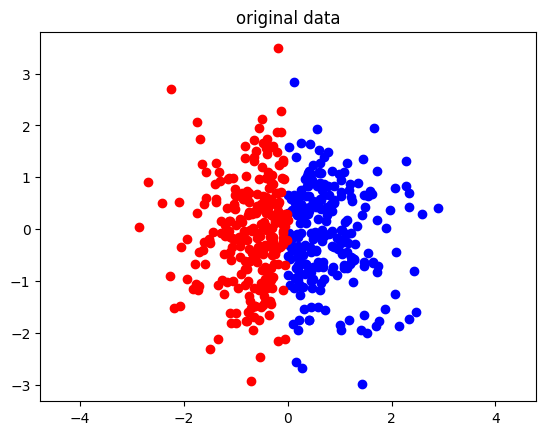

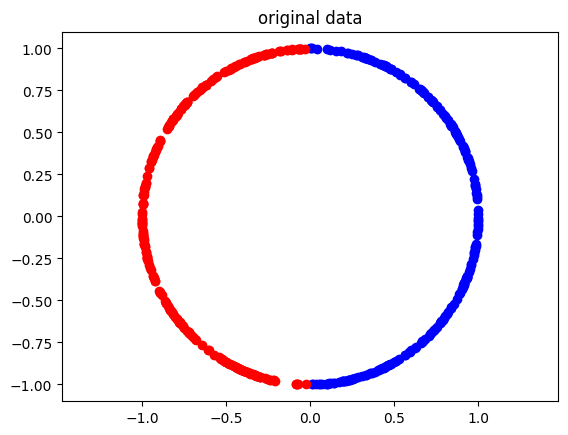

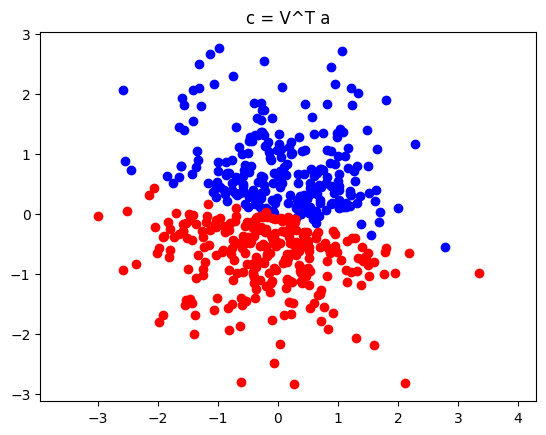

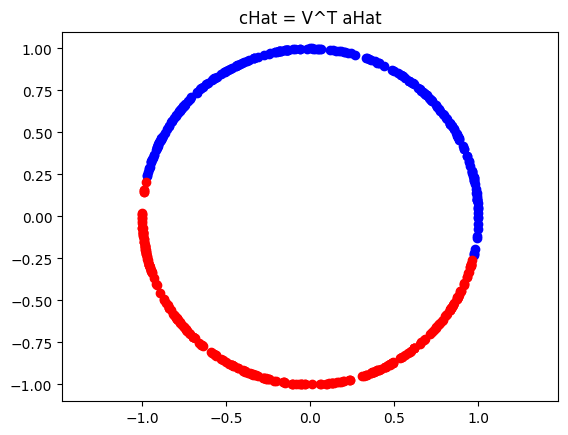

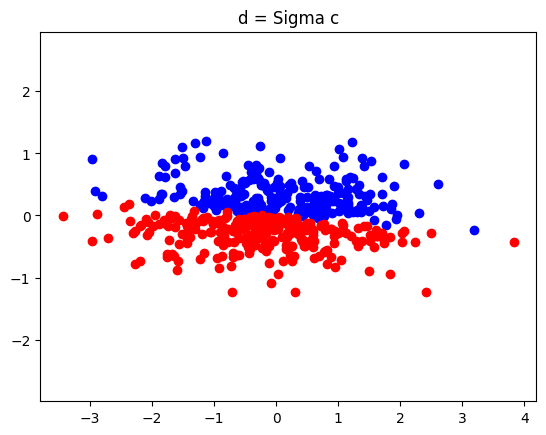

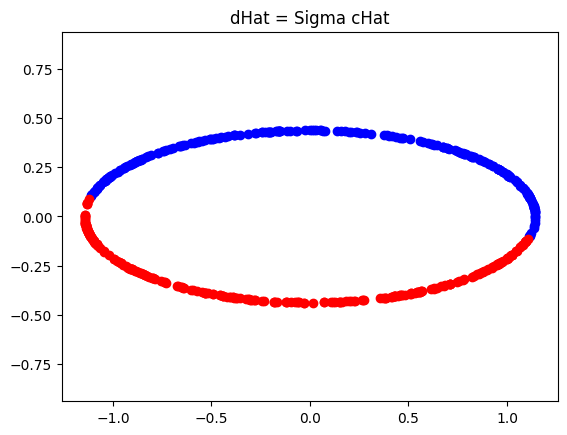

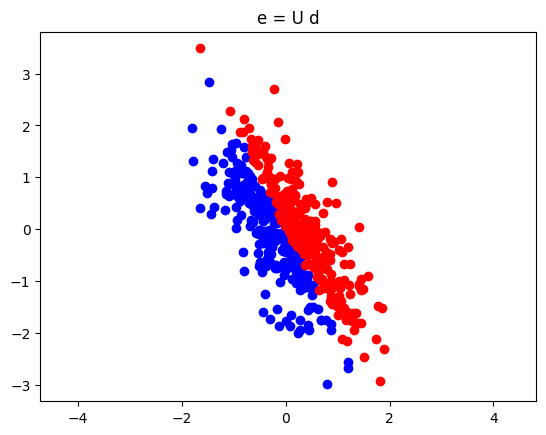

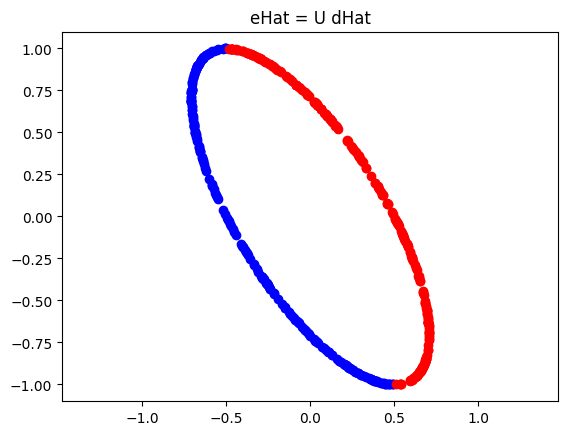

In [ ]:
# Multiply aBlue and aRed, by the matrix Vtranspose.
c_2Blue = np.dot(Vtranspose_2, a_2Blue)
c_2Red = np.dot(Vtranspose_2, a_2Red)

# Multiply aHatBlue and aHatRed, by the matrix Vtranspos
c_2HatBlue = np.dot(Vtranspose_2, a_2HatBlue)
c_2HatRed = np.dot(Vtranspose_2, a_2HatRed)

# Plot the original data
TwoColor_ScatterPlot(a_2Blue,a_2Red, title='original data')
TwoColor_ScatterPlot(a_2HatBlue,a_2HatRed, title='original data')

# Plot the data using the preloaded function TwoColor_ScatterPlot.
# Use title='c = V^T a' and title='cHat = V^T aHat'.
TwoColor_ScatterPlot(c_2Blue,c_2Red, title='c = V^T a')
TwoColor_ScatterPlot(c_2HatBlue,c_2HatRed, title='cHat = V^T aHat')


# Multiply the blue and red parts of the data c and cHat, by the matrix SigmaMat.
d_2Blue = np.dot(SigmaMat_2, c_2Blue)
d_2Red = np.dot(SigmaMat_2, c_2Red)
d_2HatBlue = np.dot(SigmaMat_2, c_2HatBlue)
d_2HatRed = np.dot(SigmaMat_2, c_2HatRed)

# Plot the data using the preloaded function TwoColor_ScatterPlot.
TwoColor_ScatterPlot(d_2Blue,d_2Red, title='d = Sigma c')
TwoColor_ScatterPlot(d_2HatBlue,d_2HatRed, title='dHat = Sigma cHat')

# Multiply the blue and red parts of the data d and dHat, by the matrix U.
e_2Blue = np.dot(U_2, d_2Blue)
e_2Red = np.dot(U_2,d_2Red)
e_2HatBlue = np.dot(U_2, d_2HatBlue)
e_2HatRed = np.dot(U_2, d_2HatRed)

# Plot the data using the preloaded function TwoColor_ScatterPlot.
TwoColor_ScatterPlot(e_2Blue,e_2Red, title='e = U d')
TwoColor_ScatterPlot(e_2HatBlue,e_2HatRed, title='eHat = U dHat')


Creating meaningful 2-dimensional visuals is difficult for 3-dimensional data (and even more difficult for higher dimensions). Due to limitations on depth perception, it is better to use highly structured data as opposed to random data.

In the next part, we will transform  a grid of points on the upper half of the unit sphere (upper hemishpere), lying in 3-dimensions, using a 3-by-3 matrix $M$. One of the best packages in Python for creating 3D plots is [plotly](https://plotly.com/python/3d-charts/). The $\texttt{go.Surface}$ function in plotly can take points on the hemisphere, and display them as the actual surface of the hemisphere. The plotly package can also create visuals that are interactive-- for instance you can click on an image object and drag it around to view the object from different vantage points! Run the code below, and try it for yourself, on the resulting image of the upper hemisphere.

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Form a meshgrid of size n-by-n. We'll do this with two angular arguments used in spherical coordinates.
# The mesh size is preset to n=20.
n=20
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, np.pi/2, n)
u,v = np.meshgrid(theta,phi)
# Express X,Y,Z in spherical coordinates.
X,Y,Z = np.sin(v)*np.cos(u), np.sin(v)*np.sin(u), np.cos(v)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
fig.update_layout(title='Upper Hemisphere: Click image and Drag!', width=600, height=600)
fig.show()

Note that plotly requires the $\texttt{go.Surface}$ function to take the arguments $x,y,$ and $z$ as 2-dimensional meshgrids (similar, to other 3D plotting packages such as the mplot3d toolkit in matplotlib). Check this for yourself by taking a look at the shape of $X,Y$ and $Z$:

In [ ]:
print(X.shape,Y.shape,Z.shape)

(20, 20) (20, 20) (20, 20)


In the next step, we'll apply a 3-by-3 matrix $M33$ to the points on this hemisphere. In order to do this, we'll first have to reshape $X,Y$ and $Z$ into row vectors and stack them to create a 3-by-$n^2$ matrix $A$ of the structured data (with default value $n=20$).

Multiply $M33$ with $A$ and then use np.reshape on the result, to get the result back into the form of meshgrids. Then we can again use plotly to create a 3D visualization.

In [ ]:
# Load a 3-by-3 matrix which will transform the hemisphere.
# Feel free to experiment with different matrices.
M33 = np.array([[1,2,1],[1,0,-8],[-1,1,0]])

# Use either np.ndarray.flatten or np.reshape to turn X,Y,Z into 1D arrays.
Xvec = X.reshape(-1)
Yvec = Y.reshape(-1)
Zvec = Z.reshape(-1)

# Next, stack the 3 vectors Xvec, Yvec, Zvec to form a 3-by-n^2 matrix called A. Try using the vstack method.
# Then multiply M33 by A (with M33 on the left).
A = np.vstack((Xvec, Yvec, Zvec))
TransformedData = np.dot(M33, A)

# Finally reshape TransformedData into an array of shape (3,n,n) using np.reshape.
# This will make each of the 3 coordinates an n-by-n meshgrid.
TDmesh = np.reshape(TransformedData,(3,n,n))

fig = go.Figure(data=[go.Surface(x=TDmesh[0], y=TDmesh[1], z=TDmesh[2])])
fig.update_layout(title='M33 applied to upper hemisphere', width=600, height=600)
fig.show()

You can now break down this transformation, just as you did in the 2-by-2 case. Start by finding the SVD decomposition $U,\Sigma,V^T$ of $M33$. Then multiply $V^T$ with the 3-by-$n^2$ data matrix $A$. The resulting image is a rotation and/or reflection of the upper hemisphere. Try clicking and dragging this image to put it back into the position of the original upper hemisphere!

In [ ]:
# Multiply Vt with the previous set of structure data A.
U3, Sigma3, Vtranspose3 = np.linalg.svd(M33)
B = np.dot(Vtranspose3, A)

Bmesh=B.reshape(3,n,n)
fig = go.Figure(data=[go.Surface(x=Bmesh[0], y=Bmesh[1], z=Bmesh[2])])
fig.update_layout(title='V^T applied to upper hemisphere', width=600, height=600)
fig.show()

Remember that $\texttt{Sigma}$ returned from $\texttt{np.linalg.np}$ is a one-dimensional array. Change this into a diagonal matrix $\Sigma$ and apply this to $B=V^T A$ to get a resulting data matrix $C$. Then reshape $C=\Sigma B$ into the form of meshgrids in order to use go.Surface.

In [ ]:
# Change Sigma to a matrix.
# Multiply this matrix with B.
SigmaMat3 = np.diag(Sigma3)
C = np.dot(SigmaMat3, B)

Cmesh=C.reshape((3,n,n))
fig = go.Figure(data=[go.Surface(x=Cmesh[0], y=Cmesh[1], z=Cmesh[2])])
fig.update_layout(title='(Sigma)(V^T) applied to upper hemisphere', width=600, height=600)
fig.show()

Finally, apply the orthogonal matrix $U$ to $C$, reshape the result, and plot the final image. This image should match the image of $M33$ directly applied to the upper hemisphere.

In [ ]:
# Multiply U with C.
D = np.dot(U3,C)

Dmesh=D.reshape((3,n,n))
fig = go.Figure(data=[go.Surface(x=Dmesh[0], y=Dmesh[1], z=Dmesh[2])])
fig.update_layout(title='(U)(Sigma)(V^T) applied to upper hemisphere', width=600, height=600)
fig.show()

Let's visualize some cases where $m\neq n$. You'll start by transforming the hemisphere using a 2-by-3 matrix. A 2-by-3 matrix maps points in 3-dimensional space to points in 2-dimensional space (i.e., the $xy$-plane). After creating this next image, click and drag on it to view it from different vantage points. This should convince you that the image lies in the $xy$-plane.

In [ ]:
# Consider a 2-by-3 matrix.
# Feel free to experiment with different matrices.
M23 = np.array([[1,2,1],[1,0,-8]])

# Multiply M23 with the previous structured data matrix A to get TransformedData23.
# To view it inside 3D space, you'll need to tack on a row of 0's to the product of M23 and A. You can use np.zeros.
# Stack TransformedData23 with the row of zeros, using np.vstack to form TD23.
# Reshape TD23 into meshgrid form.
M23A = np.dot(M23,A)
M23A_ZEROS = np.zeros(A.shape[1])
TD23 = np.vstack((M23A,M23A_ZEROS))
TD23mesh = TD23.reshape((3,n,n))

fig = go.Figure(data=[go.Surface(x=TD23mesh[0], y=TD23mesh[1], z=TD23mesh[2])])
fig.update_layout(title='M23 applied to upper hemisphere', width=600, height=600)
fig.show()

Next, you'll take the SVD of $M23$. You'll repeat the various steps of visualizing the three different parts of the SVD (as you did for $M33$). One  main difference in the case where $m\neq n$ is that $\Sigma$ is not a square matrix, and therefore is no longer technically a diagonal matrix. Instead, it is a concatenation of a diagonal matrix with additional rows of 0's when $m>n$ or additional columns of 0's when $m<n$.   

For the 2-by-3 case, you can form the matrix $\Sigma$ by first using np.diag on the one-dimensional array $\texttt{Sigma}$ (which was returned by $\texttt{np.linalg.svd}$), and then concatenating this with a column of 0's.

Also, the result after multiplying by $\Sigma$ will be 2-dimensional. Just as you did above with $M23$ applied to $A$ above, you'll need to tack on a row of 0's to both the product of $\Sigma$ and $B23$ and the product of $U$ and $C23$, below.

In [ ]:
# Get the SVD decomposition of M23.
# Change Sigma into a diagonal matrix SigmaDiagMat.
# Create ZeroColumn, a column of 0's to concatenate with SigmaDiagMat.
# Concatenate SigmaDiagMat with ZeroColumn. You may use np.hstack.
U23, Sigma23, Vtranspose23 = np.linalg.svd(M23)
SigmaDiagMat23 = np.diag(Sigma23)
ZeroColumn23 = np.zeros((SigmaDiagMat23.shape[0], 1))
SigmaMat23 = np.hstack((SigmaDiagMat23, ZeroColumn23))

# Multiply Vt with A to get B23.
# Multiply SigmaMat with B23 to get C23.
# Multiply U with C23 to get D23.
B23 = np.dot(Vtranspose23,A)
C23 = np.dot(SigmaMat23, B23)
D23 = np.dot(U23,C23)

Zeros = np.zeros(A.shape[1])
# To view C23 and D23 inside 3D space, you'll need to tack on a row of 0's.
C23 = np.vstack((C23,Zeros))
D23 = np.vstack((D23,Zeros))

B23mesh, C23mesh, D23mesh = B23.reshape(3,n,n), C23.reshape((3,n,n)), D23.reshape((3,n,n))
fig = go.Figure(data=[go.Surface(x=B23mesh[0], y=B23mesh[1], z=B23mesh[2])])
fig.update_layout(title='V^T applied to hemisphere', width=400, height=400)
fig.show()
fig = go.Figure(data=[go.Surface(x=C23mesh[0], y=C23mesh[1], z=C23mesh[2])])
fig.update_layout(title='(Sigma)(V^T) applied to hemisphere', width=400, height=400)
fig.show()
fig = go.Figure(data=[go.Surface(x=D23mesh[0], y=D23mesh[1], z=D23mesh[2])])
fig.update_layout(title='(U)(Sigma)(V^T) applied to hemisphere', width=400, height=400)
fig.show()

A 2-by-3 matrix $M23$ maps points in the 2-dimensional plane to points in 3-dimensional space. So you cannot apply $M23$ to the structured set of points $A$ since these points lie in 3-dimensional space.  Viewing $A$ as a vertical stack of three 1-by-400 row vectors $X,Y,Z$:
$$
A =
\left(\begin{matrix}
X\\
Y \\
Z
\end{matrix}\right),
$$
it suffices to simply get rid of the $Z$ vector. Then we are left with
a new structured set of points $A2=\left(\begin{matrix}
X\\
Y
\end{matrix}\right),$ lying in the unit disk in the $xy$-plane (think of projecting or flattening the upper hemisphere into a thin flat pancake in the $xy$-plane).

After applying $M23$ to $A2$, the resulting set of points will lie in $xyz$-space, but you'll soon see that in fact, all the points lie in some plane (not necessarily the $xy$-plane). Run the next bit of code and click and drag on the resulting image to view it from different vantage points. This should convince you that the resulting image lies in some plane sitting in $xyz$-space.

In [ ]:
# Consider a 3x2 matrix.
M32 = np.array([[1,1],[2,0],[-8,1]])
# The structured data matrix A2 consists of the top two rows of A.
A2 = np.vstack((Xvec,Yvec))
# Apply the matrix M32 to the data A2.
TransformedData32 = np.dot(M32,A2)
# Reshape the transformed data into meshgrid form.
TD32mesh = TransformedData32.reshape((3,n,n))

fig = go.Figure(data=[go.Surface(x=TD32mesh[0], y=TD32mesh[1], z=TD32mesh[2])])
fig.update_layout(title='M32 applied to unit disk', width=600, height=600)
fig.show()

Take the SVD of $M32$ and repeat the previous steps of visualizing the three different parts of the SVD. Remember that the matrix $\Sigma$ is not square.  Since $m=3>n=2$, it is a concatenation of a diagonal matrix with an additional row of 0's. Also, the result after multiplying by $V^T$ will be 2-dimensional. As you have done before, you'll need to tack on a row of 0's to the product of $V^T$ and $A2$.

In [ ]:
# Get the SVD decomposition of M32.
# Change Sigma into a diagonal matrix SigmaDiagMat.
# Create ZeroRow, a row of 0's to concatenate with SigmaDiagMat.
# Concatenate SigmaDiagMat with ZeroRow.

U32, Sigma32, Vtranspose32 = np.linalg.svd(M32)
SigmaDiagMat32 = np.diag(Sigma32)
ZeroRow32 = np.zeros((1, SigmaDiagMat32.shape[1]))
SigmaMat32 = np.vstack((SigmaDiagMat32, ZeroRow32))

# Multiply Vt with A2 to get B23.
# Multiply SigmaMat with B23 to get C23.
# Multiply U with C23 to get D23.
B32 = np.dot(Vtranspose32,A2)
C32 = np.dot(SigmaMat32, B32)
D32 = np.dot(U32,C32)

Zeros32 = np.zeros(A.shape[1])
# To view B23 inside 3D space, you'll need to tack on a row of 0's.
B32 = np.vstack((B32,Zeros32))

B32mesh, C32mesh, D32mesh = B32.reshape(3,n,n), C32.reshape((3,n,n)), D32.reshape((3,n,n))
fig = go.Figure(data=[go.Surface(x=B32mesh[0], y=B32mesh[1], z=B32mesh[2])])
fig.update_layout(title='V^T applied to unit disk', width=400, height=400)
fig.show()
fig = go.Figure(data=[go.Surface(x=C32mesh[0], y=C32mesh[1], z=C32mesh[2])])
fig.update_layout(title='(Sigma)(V^T) applied to unit disk', width=400, height=400)
fig.show()
fig = go.Figure(data=[go.Surface(x=D32mesh[0], y=D32mesh[1], z=D32mesh[2])])
fig.update_layout(title='(U)(Sigma)(V^T) applied to unit disk', width=400, height=400)
fig.show()

There are several different ways to compute the SVD of a matrix $M$. Referring back to the definition of singular values and singular vectors I gave earlier in this project, perhaps the simplest and most straight-forward way is to find the eigenvalue decompositions of the symmetric matrix $MM^T$ (or alternatively $M^TM$). This will give us the singular values of $M$ as well as the left singular vectors of $M$... [say more about solving for left vectors, instabilities when not square]

In practice, this is not the way that most packages compute the SVD because finding eigenvalues is a bit unstable with respect to rounding errors. However, for illustrative purposes...
[Say more?]

In [ ]:
def compact_SVD(M):
    # If m<n, find the SVD of the transpose.
    flag = 0
    if M.shape[0]<M.shape[1]:
      M, flag = M.T, 1

    # Find the matrix product (M)(M^T).
    MMt = np.dot(M, M.T)

    # Use np.linalg.eig to get the eigenvalues and eigenvectors of the above product.
    e_valsMMt, e_vecsMMt = np.linalg.eig(MMt)


    # Next, take the square roots of the eigenvalues.
    Sigma_unsorted = np.sqrt(e_valsMMt)

    # Fix instabilities due to rounding errors.
    np.ma.fix_invalid(Sigma_unsorted, copy=False, fill_value=0)

    # Sort the eigenvectors and eigenvalues so that they correspond to biggest to smallest.
    U = e_vecsMMt[:,np.argsort(Sigma_unsorted)[::-1]]
    Sigma = np.sort(Sigma_unsorted)[::-1]

    # Get rid of zeros in Sigma.
    r = np.linalg.matrix_rank(M)
    Sigma = Sigma[:r]

    # Change the one-dimensional array Sigma into a matrix.
    SigmaMat = np.diag(Sigma)

    # Use np.linalg.solve to find V as the solution to (Sigma)(V) equals the first r rows of (U^T)(M).
    Vt = np.linalg.solve(SigmaMat, U[:,0:r].T)

    if flag == 1:
      return Vt.T, Sigma, U[:,0:r].T
    else:
      return U[:,0:r], Sigma, Vt

The SVD of a matrix $M$ is not unique. This is because the eigenvectors associated to eigenvalues are not unique. However, the set of singular values of $M$  is uniquely determined by $M$. Run the next bit of code to check that your SVD function returns the same set of singular values as $\texttt{linalg.svd}$.

Also check that taking the product of the three matrices returned from the SVD function you wrote, gives you back the matrix $M$.

In [ ]:
M = np.array([[1,2,1],[1,0,-8],[-1,1,0],[1,2,3]])
print(np.linalg.svd(M)[1])
print(compact_SVD(M)[1])


[8.66912482 3.15749426 1.36985574]
[8.66912482 3.15749426 1.36985574]
